<a href="https://colab.research.google.com/github/JSRV18/Dinosaurio-repository/blob/main/Complementaria_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Complementaria métodos computacionales 1
>
> Semana 05

***

# 1) Newton-Raphson con parada

### 1.a) 1.5pt

Escriba una función llamada `find_root_iters(f,x0,h=1e-6,max_iters=50,atol=1e-5,rtol=1e-5)` que implemente el método de Newton Rhapson, es decir, que dada una función $f$ y un valor inicial $x_0$, encuentre un valor `root` tal que $f(x)\approx 0$.

* Aproxime la derivada de la función usando la derivada central: $f'(x) = \frac{f(x+h)-f(x-h)}{2h}$.
* El método debe parar cuando alcance un número dado de iteraciones `max_iters`.
    * Si antes de alcanzar esas iteraciones se alcanza la precisión adecuada, es decir $f(x)\approx 0$, el método debe parar prematuramente y retornar el $x$ actual.
    * En python, ese $\approx$ significa usar `np.isclose(0.,f(x),atol,rtol)`. La tolerancia absoluta `atol` y la relativa `rtol` entran por parámetro, y pueden tener el valor por defecto de `1e-5`.
* Debe retornar el número de iteraciones y el valor de $x$.

Use el siguiente código para verificar su solución:
Puede usar el siguiente código para probar su función

```python
from scipy.special import lambertw
np.isclose(
    find_root_iters(lambda x: x*np.exp(x)-5,0.4)[1],
    lambertw(5)
)
```


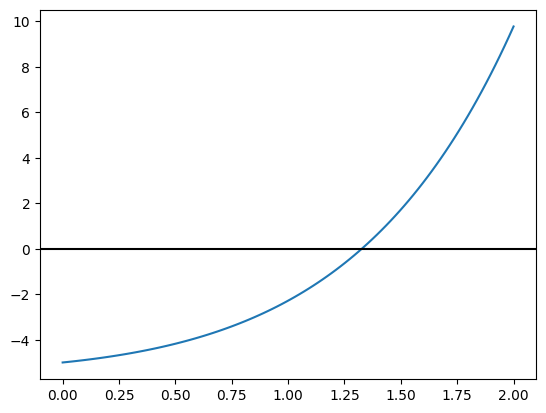

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(0,2,100)

def f_1(x):
    return x*np.exp(x)-5

y=np.array(f_1(x))

def derivate(f,x,h=1e-6):
    return (f(x+h)-f(x-h))/(2*h)

def find_root_iters(f,x0,h=1e-6,max_iters=50,atol=1e-5,rtol=1e-5):
    for i in range(max_iters):
      xn=x0-f(x0)/derivate(f,x0,h)
      if np.isclose(0.,f(xn),atol,rtol):
        return i,xn
      x0=xn
    return i,xn

plt.plot(x,y)
plt.axhline(0,color='black')
plt.show()

In [4]:
find_root_iters(f_1, 0.2, h=1e-6, max_iters=50, atol=1e-5, rtol=1e-5)

(7, 1.3267246652438358)

### 1.b) 0.5pt

Haga una función llamada `find_root` que llame a la función anterior, con todos sus argumentos, pero que sólo retorne el valor de $x$, sin retornar el número de iteraciones. Esta función debe poder recibir arrays como argumento para `x0`.

Para ello, use `@np.vectorize` como decorador en `find_root`.

Pruebe su función con este código
```python
from scipy.special import lambertw
all(np.isclose(
    find_root(lambda x: x**3-0.4,[0.4,0.9j]),
    [0.7368+0.j, -0.36840314+0.63809297j]
))
```

In [3]:
@np.vectorize
def find_root(f,x0,h=1e-6,max_iters=50,atol=1e-5,rtol=1e-5):
  return find_root_iters(f,x0,h,max_iters,atol,rtol)[1]

In [15]:
find_root(f_1, x, h=1e-6, max_iters=50, atol=1e-5, rtol=1e-5)

array([1.32672533, 1.32672472, 1.32672467, 1.32672467, 1.32672467,
       1.32672498, 1.3267247 , 1.32672467, 1.32672467, 1.32672467,
       1.32672467, 1.32672494, 1.32672472, 1.32672467, 1.32672467,
       1.32672467, 1.32672467, 1.32672467, 1.32672532, 1.32672486,
       1.32672472, 1.32672468, 1.32672467, 1.32672467, 1.32672467,
       1.32672467, 1.32672467, 1.32672467, 1.32672533, 1.32672494,
       1.32672477, 1.32672471, 1.32672468, 1.32672467, 1.32672467,
       1.32672467, 1.32672467, 1.32672467, 1.32672467, 1.32672467,
       1.32672467, 1.32672533, 1.32672499, 1.32672482, 1.32672473,
       1.3267247 , 1.32672468, 1.32672467, 1.32672467, 1.32672467,
       1.32672467, 1.32672467, 1.32672467, 1.32672467, 1.32672467,
       1.32672538, 1.32672498, 1.32672479, 1.32672471, 1.32672468,
       1.32672467, 1.32672467, 1.32672467, 1.32672467, 1.32672516,
       1.32672468, 1.32672467, 1.32672485, 1.32672467, 1.32672467,
       1.32672467, 1.32672467, 1.32672467, 1.32672468, 1.32672

### 1.c) Fractal de Newton 1.0 pt

Considerando la función $f(z) = z^3-(1+i)$, use el método de Newton Raphson para construir el fractal de Newton.

* Haga una grilla de valores iniciales complejos con parte real desde -2 hasta 2, y parte imaginaria desde -2i hasta 2i. Se recomienda usar `np.meshgrid`.
    * Haga un array de parte real `x` y parte imaginaria `y`, y con `x,y=np.meshgrid(x,y)`, puede armar la grilla compleja con `z=x+1j*y`.
    * Para hacer pruebas, use sólo 20 valores en cada array (`x` y `y`). Para el resultado final, 150 valores en cada array.

* Use la función del ejercicio anterior, `find_root`, para hallar las raíces cúbicas de (1+i) a las que converge cada condición inicial de la grilla.

* Use `np.angle` para hallar el ángulo de estas soluciones en los complejos. Grafique los valores de estos ángulos con `plt.imshow`.

Su imagen resultante se debe parecer a [esto](https://upload.wikimedia.org/wikipedia/commons/d/db/Julia_set_for_the_rational_function.png).

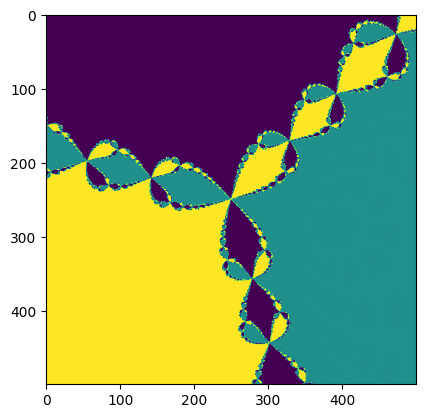

In [18]:
X=np.linspace(-2,2,500)
Y=np.linspace(-2,2,500)
X,Y=np.meshgrid(X,Y)
Z=X+1j*Y

plt.imshow(np.angle(find_root(lambda z: z**3-(1+1j),Z)))

# 2) Interpolación de Lagrange con álgebra lineal

Dadas $n$ observaciones de datos $(x_0,y_0), (x_1,y_1), ... , (x_{n-1},y_{n-1})$, se quieren hallar $n$ coeficientes tales que para todo $k$,
$$
y_k = \sum_{i=0}^{n-1} a_i x_k^i
$$
Esto se puede representar matricialmente de esta manera:

$$
V \, \vec{a} = \vec{y}
$$

\begin{equation}
\begin{pmatrix}
x_0^{n-1} & ... & x_0^2 & x_0 & 1 \\
x_1^{n-1} & ... & x_0^2 & x_0 & 1 \\
... & ... & ... & ... \\
x_{n-1}^{n-1} & ... & x_{n-1}^2 & x_{n-1} & 1
\end{pmatrix}
\begin{pmatrix}
a_{n-1} \\
... \\
a_2 \\
a_1 \\
a_0
\end{pmatrix} = \begin{pmatrix}
y_0 \\
y_1 \\
... \\
y_{n-1}
\end{pmatrix}
\end{equation}

Esa matriz de arriba se conoce como la matriz de Vandermonde, y se puede generar con `np.vander`.

Los coeficientes de interpolación se obtienen como $\vec{a}=V^{-1}\vec{y}$. Use `np.linalg.inv` para invertir la matriz.

**2.0pt**

Encuentre de esta manera los coeficientes de interpolación $a_i$ para la función $f(x)=e^{-x^2}$, para los puntos `x = np.linspace(-5,5,n)`, para varios `n`, desde 5 hasta 11. Grafique para cada $n$ la función continua, los datos, y la función de interpolación (el polinomio con los coeficientes obtenidos) Responda: ¿Por qué la interpolación diverge entre punto y punto?

In [4]:
n=11
x_i=np.linspace(-5,5,n)
def f_2(x):
  return np.exp(-x**2)

y_i=f_2(x_i)

def Coeficientes_Interpolacion(f,x):
  return np.linalg.inv(np.vander(x))@f(x)

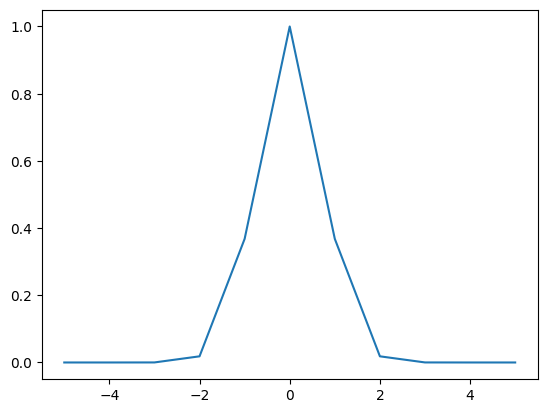

In [5]:
Coeficientes_Interpolacion(f_2,x_i)

plt.plot(x_i,y_i)
